In [2]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_data = pd.read_csv('C:/Users/Chenming/Desktop/assignment3/Data1_Car/car.csv')
#convert buying to int, 'vhigh'->0, 'high'->1,'med'->2,'low'->3, save to a new dataset: data 
raw_data['buying'] = raw_data.buying.str.replace('vhigh','0')
raw_data['buying'] = raw_data.buying.str.replace('high','1')
raw_data['buying'] = raw_data.buying.str.replace('med','2')
raw_data['buying'] = raw_data.buying.str.replace('low','3')
data=raw_data
data['buying']=raw_data.buying
data['buying']=data.buying.astype(int)

In [4]:
#convert maint to int, 'vhigh'->0, 'high'->1,'med'->2,'low'->3, save to a new dataset: data 
raw_data['maint'] = raw_data.maint.str.replace('vhigh','0')
raw_data['maint'] = raw_data.maint.str.replace('high','1')
raw_data['maint'] = raw_data.maint.str.replace('med','2')
raw_data['maint'] = raw_data.maint.str.replace('low','3')
data['maint']=raw_data.maint
data['maint']=data.maint.astype(int)

In [5]:
#convert doors, 5more ->5, all to int
raw_data['doors'] = raw_data.doors.str.replace('5more','5')
data['doors']=raw_data.doors
data['doors']=data.doors.astype(int)

In [6]:
#persons more->5, all to int
raw_data['persons'] = raw_data.persons.str.replace('more','5')
data['persons']=raw_data.persons
data['persons']=data.persons.astype(int)

In [7]:
#lug_boot, small->0, med->1, big->2, all to int
raw_data['lug_boot'] = raw_data.lug_boot.str.replace('small','0')
raw_data['lug_boot'] = raw_data.lug_boot.str.replace('med','1')
raw_data['lug_boot'] = raw_data.lug_boot.str.replace('big','2')
data['lug_boot']=raw_data.lug_boot
data['lug_boot']=data.lug_boot.astype(int)

In [8]:
#safety, low->0, med->1, high->2
raw_data['safety'] = raw_data.safety.str.replace('low','0')
raw_data['safety'] = raw_data.safety.str.replace('med','1')
raw_data['safety'] = raw_data.safety.str.replace('high','2')
data['safety']=raw_data.safety
data['safety']=data.safety.astype(int)

In [9]:
#set label column
data['acceptable_label'] = raw_data.acceptable

In [10]:
#acceptable, unacc->0, acc->1, good->2, vgood->3
raw_data['acceptable'] = raw_data.acceptable.str.replace('unacc','0')
raw_data['acceptable'] = raw_data.acceptable.str.replace('acc','1')
raw_data['acceptable'] = raw_data.acceptable.str.replace('good','2')
raw_data['acceptable'] = raw_data.acceptable.str.replace('v2','3')
data['acceptable']=raw_data.acceptable
data['acceptable']=data.acceptable.astype(int)
data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptable,acceptable_label
0,0,0,2,2,0,0,0,unacc
1,0,0,2,2,0,1,0,unacc
2,0,0,2,2,0,2,0,unacc
3,0,0,2,2,1,0,0,unacc
4,0,0,2,2,1,1,0,unacc


In [11]:
data.describe()

,buying,maint,doors,persons,lug_boot,safety,acceptable
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,3.500000,3.666667,1.000000,1.000000,0.414931
std,1.118358,1.118358,1.118358,1.247580,0.816733,0.816733,0.740700
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,2.750000,2.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,3.500000,4.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,4.250000,5.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000,3.000000


In [12]:
data.pivot_table(index='acceptable_label', values=['buying','maint','doors','persons','lug_boot','safety'],aggfunc=np.mean)

,buying,doors,lug_boot,maint,persons,safety
acceptable_label,,,,,,
acc,1.575521,3.585938,1.101562,1.591146,4.484375,1.531250
good,2.666667,3.565217,1.043478,2.666667,4.478261,1.434783
unacc,1.350413,3.454545,0.932231,1.366942,3.314050,0.752893
vgood,2.600000,3.769231,1.615385,2.200000,4.538462,2.000000


In [13]:
d_corr=data.iloc[:,[0,1,2,3,4,5,6]].corr()
d_corr
#acceptable related to safety most, for features only lug_boot related to persons

,buying,maint,doors,persons,lug_boot,safety,acceptable
buying,1.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.282750
maint,0.00000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.232422
doors,0.00000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.066057
persons,0.00000,0.000000,0.000000,1.000000e+00,2.523651e-19,0.000000,0.373459
lug_boot,0.00000,0.000000,0.000000,2.523651e-19,1.000000e+00,0.000000,0.157932
safety,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.439337
acceptable,0.28275,0.232422,0.066057,3.734592e-01,1.579317e-01,0.439337,1.000000


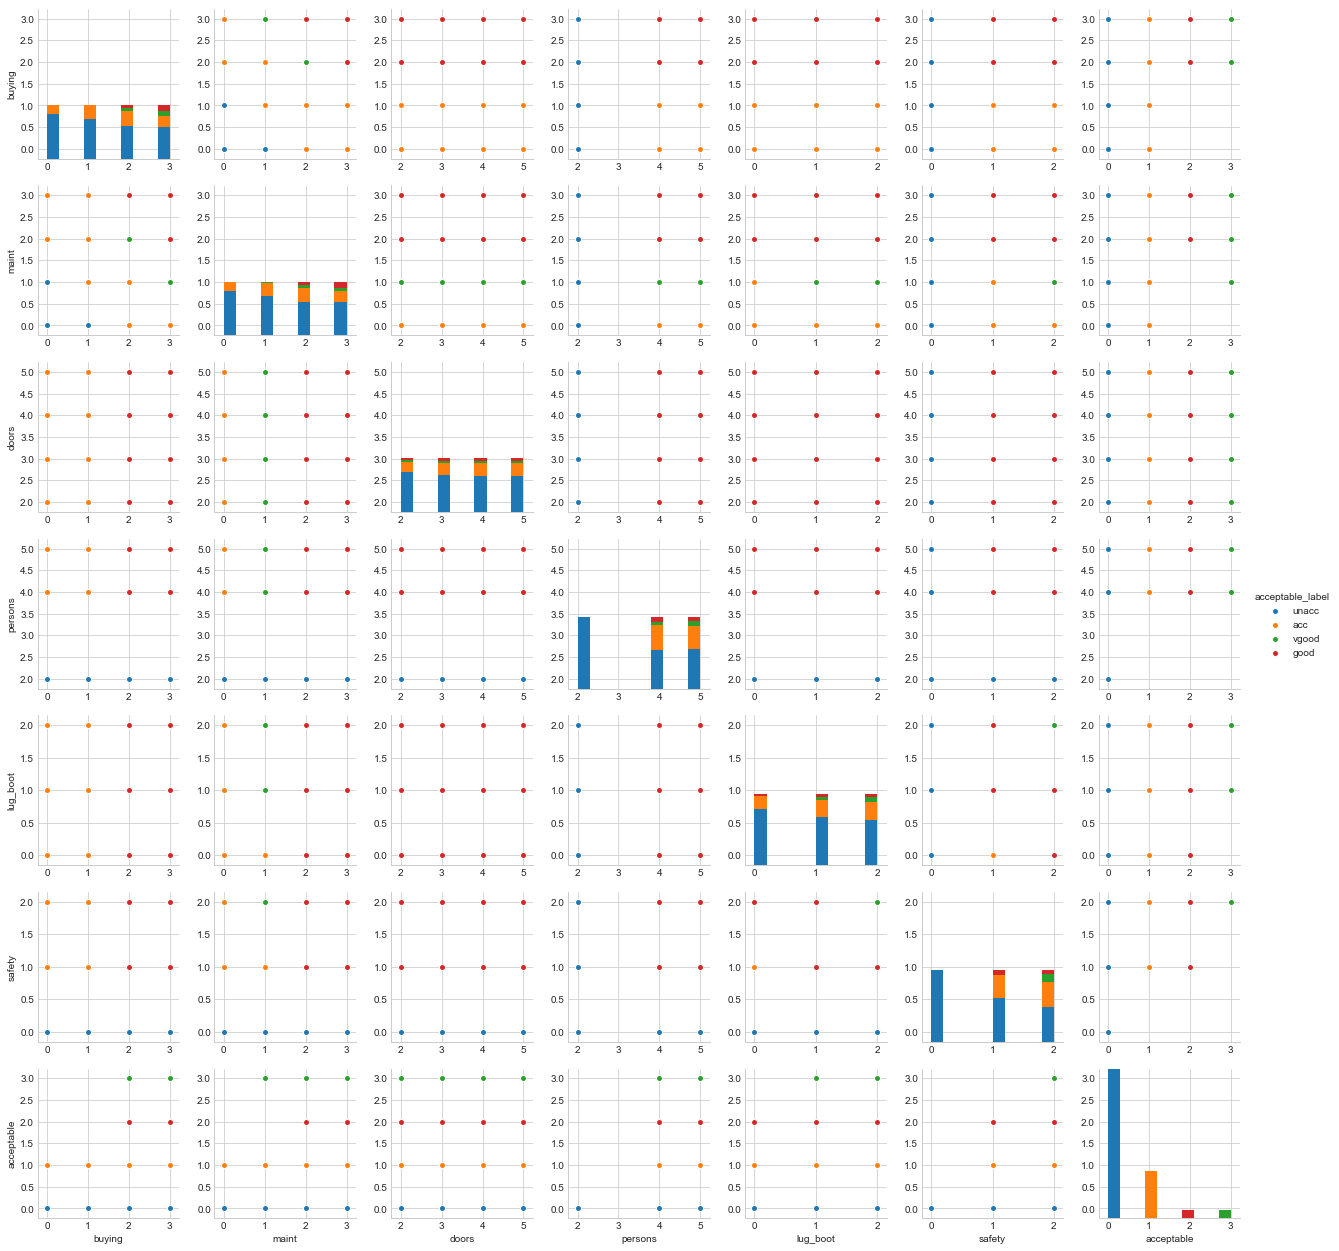

In [14]:
sns.set_style('whitegrid')
sns.pairplot(data.iloc[:,[0,1,2,3,4,5,6,7]], hue='acceptable_label')
plt.show()

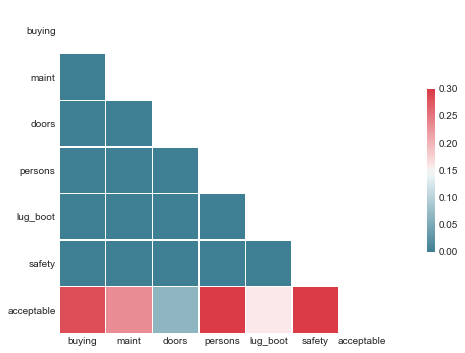

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
mask = np.zeros_like(d_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d_corr,mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [16]:
#choose best K
data_check_K = data.drop(['acceptable','acceptable_label'], axis=1)
data_check_K.head()
data_check_K.to_csv('data_check_K.csv', sep='\t')

In [51]:
K_list=[]
cost_value=[]
for k in range (1, 100):
 
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(data_check_K.iloc[:, :])


# Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    K_list.append(k)
    cost_value.append(interia)
    print ("k:",k, " cost:", interia)
data_K = np.array([K_list,
                cost_value])
data_K_df = pd.DataFrame(data=data_K).T                
#data_K_df.to_csv('data_K_df.csv', sep='\t')


k: 1  cost: 11472.0
k: 2  cost: 9072.0
k: 3  cost: 7920.0
k: 4  cost: 7260.0
k: 5  cost: 6684.0
k: 6  cost: 6157.66386555
k: 7  cost: 5829.91386555
k: 8  cost: 5504.61558442
k: 9  cost: 5202.0
k: 10  cost: 4927.23752718
k: 11  cost: 4686.6842055
k: 12  cost: 4463.06470588
k: 13  cost: 4281.21428571
k: 14  cost: 4218.28827938
k: 15  cost: 4056.06923077
k: 16  cost: 3935.80308076
k: 17  cost: 3865.15734266
k: 18  cost: 3800.93331211
k: 19  cost: 3736.60396312
k: 20  cost: 3609.38908836
k: 21  cost: 3592.1217411
k: 22  cost: 3471.80307399
k: 23  cost: 3394.55462244
k: 24  cost: 3364.0989481
k: 25  cost: 3267.31372549
k: 26  cost: 3257.46946666
k: 27  cost: 3196.67024269
k: 28  cost: 3155.35032023
k: 29  cost: 3108.37460317
k: 30  cost: 3074.50899603
k: 31  cost: 3040.37990732
k: 32  cost: 2987.35586166
k: 33  cost: 2965.81992537
k: 34  cost: 2894.21772502
k: 35  cost: 2873.14192422
k: 36  cost: 2842.45424607
k: 37  cost: 2799.1953562
k: 38  cost: 2780.00585552
k: 39  cost: 2755.27080411
k

Text(0,0.5,'cost')

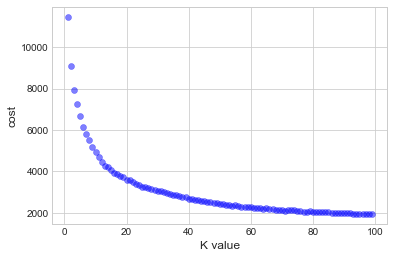

In [52]:
plt.scatter(K_list, cost_value, c="b", alpha=0.5,
            label="cost")
plt.xlabel("K value")
plt.ylabel("cost")

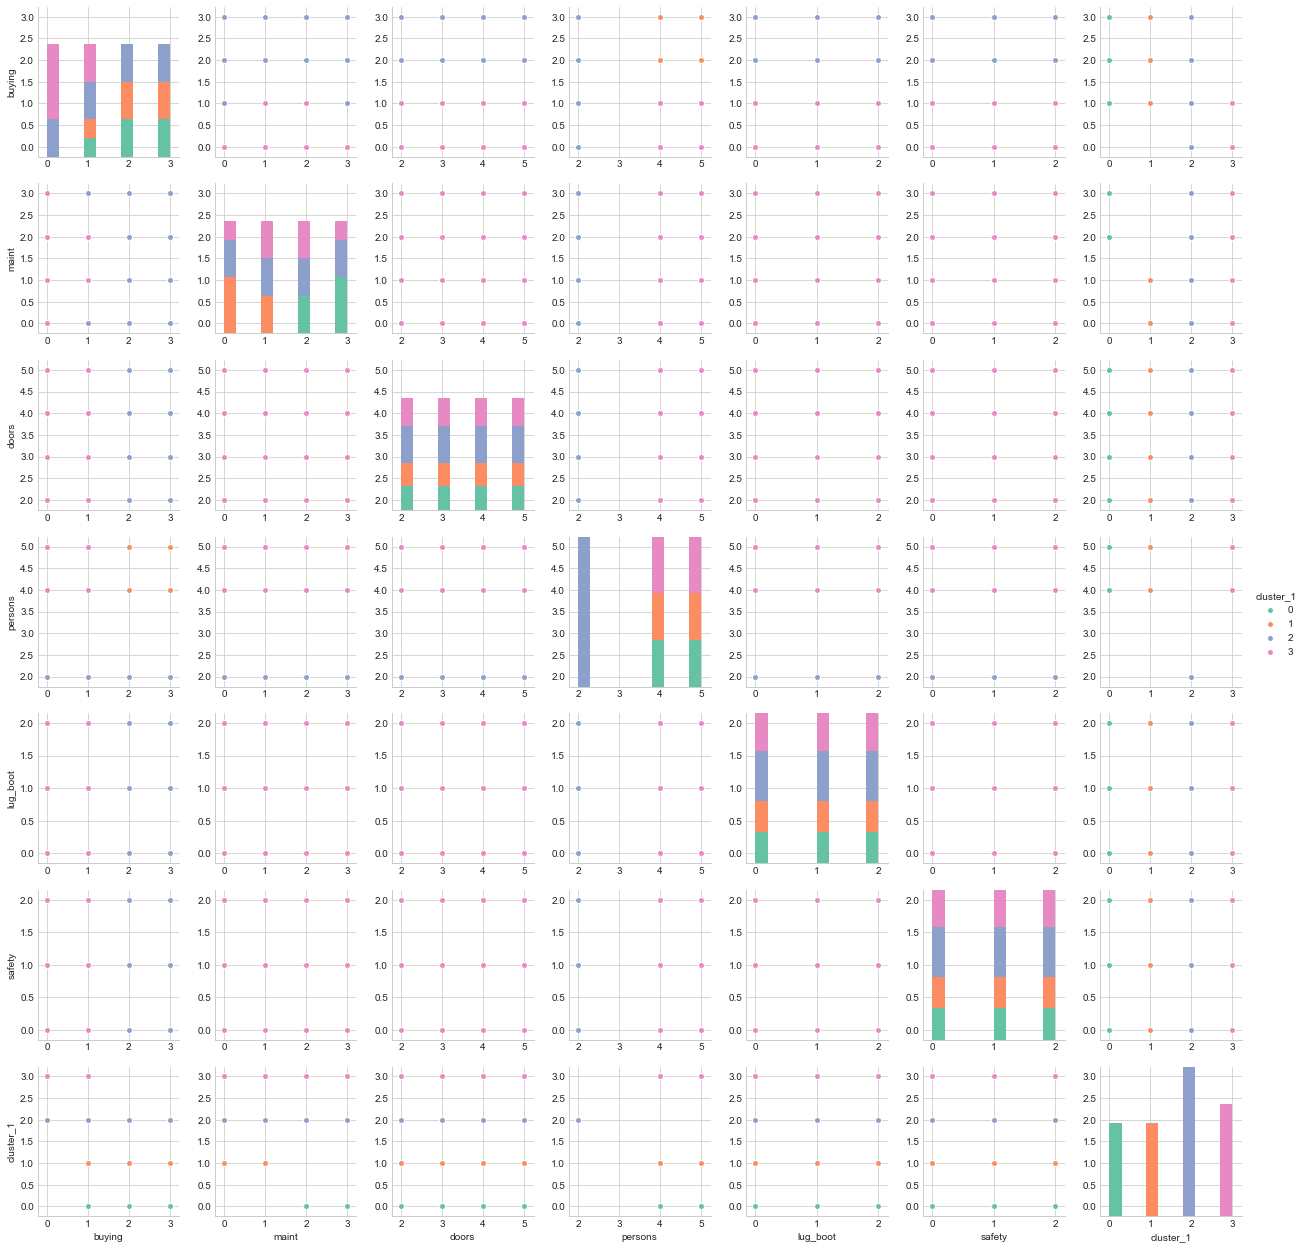

In [17]:
#K=4 K-means
kmeans_model_1 = KMeans(n_clusters=4,random_state=123)
distances_1 = kmeans_model_1.fit_transform(data.iloc[:,0:6])
labels_1 = kmeans_model_1.labels_
data['cluster_1']=labels_1
#One new columns have been added to the data, 9 (index=[8]) columns now
with sns.color_palette("Set2", 10):
    sns.pairplot(data.iloc[:,[0,1,2,3,4,5,8]], hue='cluster_1')

In [18]:
#statistics of acceptable_label cluster_1 vs species
tb1 = pd.crosstab(data['acceptable_label'],labels_1)
tb1

col_0,0,1,2,3
acceptable_label,,,,
acc,99,141,0,144
good,69,0,0,0
unacc,140,206,576,288
vgood,52,13,0,0


In [19]:
#cluster_1_label
def cluster_1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(4))
    if tb1.iloc[0,alpha] == label_max:
        return 'acc'
    if tb1.iloc[1,alpha] == label_max:
        return 'good'
    if tb1.iloc[2,alpha] == label_max:
        return 'unacc'
    if tb1.iloc[3,alpha] == label_max:
        return 'vgood'
data['cluster_1_label']=data['cluster_1'].apply(cluster_1_label)
data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptable,acceptable_label,cluster_1,cluster_1_label
0,0,0,2,2,0,0,0,unacc,2,unacc
1,0,0,2,2,0,1,0,unacc,2,unacc
2,0,0,2,2,0,2,0,unacc,2,unacc
3,0,0,2,2,1,0,0,unacc,2,unacc
4,0,0,2,2,1,1,0,unacc,2,unacc


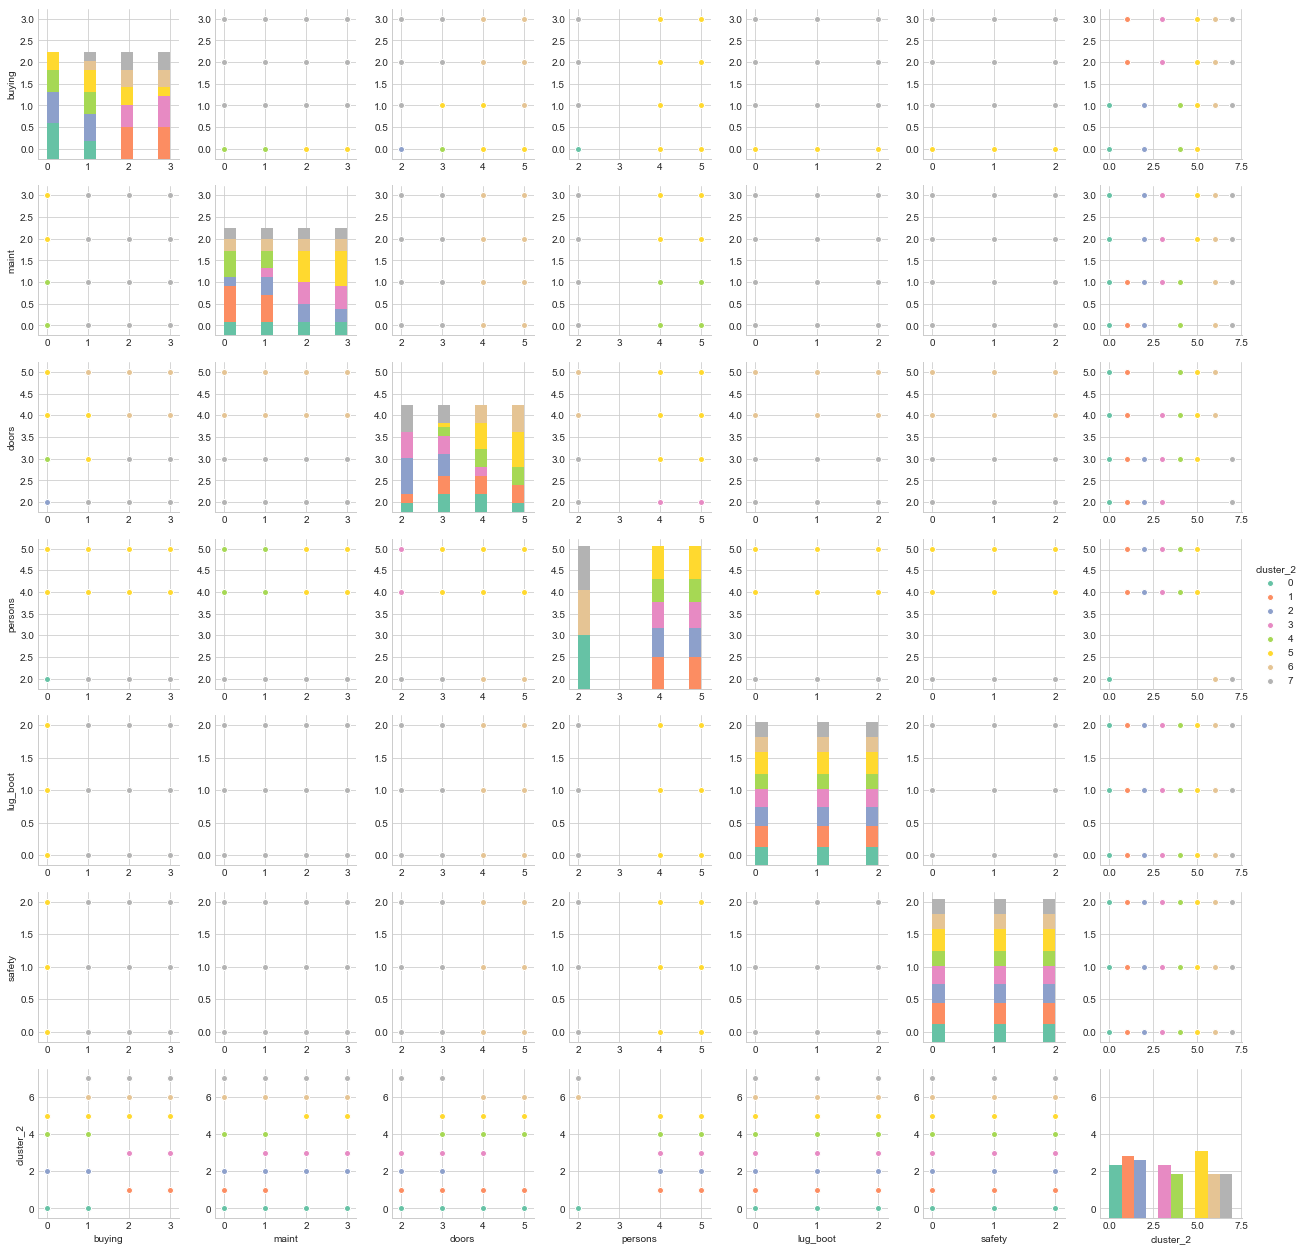

In [20]:
#K=8
kmeans_model_2 = KMeans(n_clusters=8,random_state=123)
distances_2 = kmeans_model_2.fit_transform(data.iloc[:,0:6])
labels_2 = kmeans_model_2.labels_
data['cluster_2']=labels_2
#total is 10 (index=[9]) columns now
with sns.color_palette("Set2", 10):
    sns.pairplot(data.iloc[:,[0,1,2,3,4,5,10]], hue='cluster_2')

In [21]:
#compare labels K=8
tb2 = pd.crosstab(data['acceptable_label'],labels_2)
#cant separate

In [22]:
#cluster_2_label
def cluster_2_label(alpha):
    label_max = max(tb2.iloc[i,alpha] for i in range(4))
    if tb2.iloc[0,alpha] == label_max:
        return 'acc'
    if tb2.iloc[1,alpha] == label_max:
        return 'good'
    if tb2.iloc[2,alpha] == label_max:
        return 'unacc'
    if tb2.iloc[3,alpha] == label_max:
        return 'vgood'
data['cluster_2_label']=data['cluster_2'].apply(cluster_2_label)
data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptable,acceptable_label,cluster_1,cluster_1_label,cluster_2,cluster_2_label
0,0,0,2,2,0,0,0,unacc,2,unacc,0,unacc
1,0,0,2,2,0,1,0,unacc,2,unacc,0,unacc
2,0,0,2,2,0,2,0,unacc,2,unacc,0,unacc
3,0,0,2,2,1,0,0,unacc,2,unacc,0,unacc
4,0,0,2,2,1,1,0,unacc,2,unacc,0,unacc


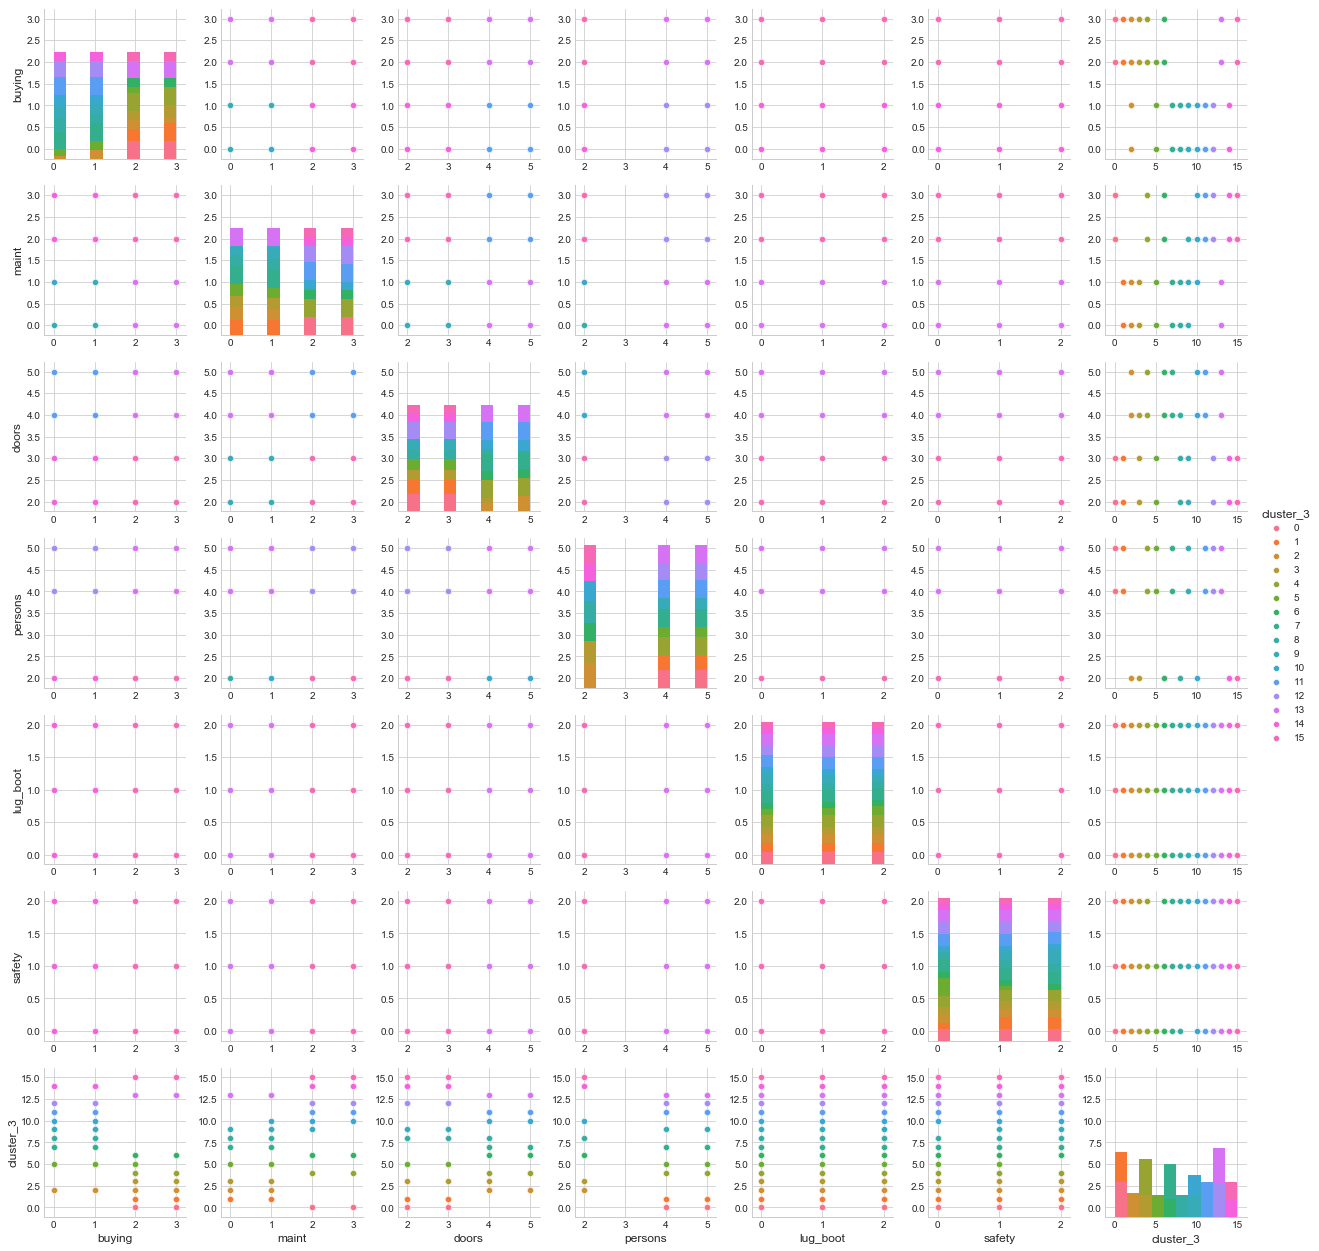

In [59]:
#K=16
kmeans_model_3 = KMeans(n_clusters=16,random_state=123)
distances_3 = kmeans_model_3.fit_transform(data.iloc[:,0:6])
labels_3 = kmeans_model_3.labels_
data['cluster_3']=labels_3
with sns.color_palette("Set2", 10):
    sns.pairplot(data.iloc[:,[0,1,2,3,4,5,12]], hue='cluster_3')

In [60]:
#compare labels K=16
tb3 = pd.crosstab(data['acceptable_label'],labels_3)
#cant separate

In [61]:
#cluster_3_label
def cluster_3_label(alpha):
    label_max = max(tb3.iloc[i,alpha] for i in range(4))
    if tb3.iloc[0,alpha] == label_max:
        return 'acc'
    if tb3.iloc[1,alpha] == label_max:
        return 'good'
    if tb3.iloc[2,alpha] == label_max:
        return 'unacc'
    if tb3.iloc[3,alpha] == label_max:
        return 'vgood'
data['cluster_3_label']=data['cluster_3'].apply(cluster_3_label)
data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptable,acceptable_label,cluster_1,cluster_1_label,cluster_2,cluster_2_label,cluster_3,cluster_3_label
0,0,0,2,2,0,0,0,unacc,2,unacc,0,unacc,8,unacc
1,0,0,2,2,0,1,0,unacc,2,unacc,0,unacc,8,unacc
2,0,0,2,2,0,2,0,unacc,2,unacc,0,unacc,8,unacc
3,0,0,2,2,1,0,0,unacc,2,unacc,0,unacc,8,unacc
4,0,0,2,2,1,1,0,unacc,2,unacc,0,unacc,8,unacc


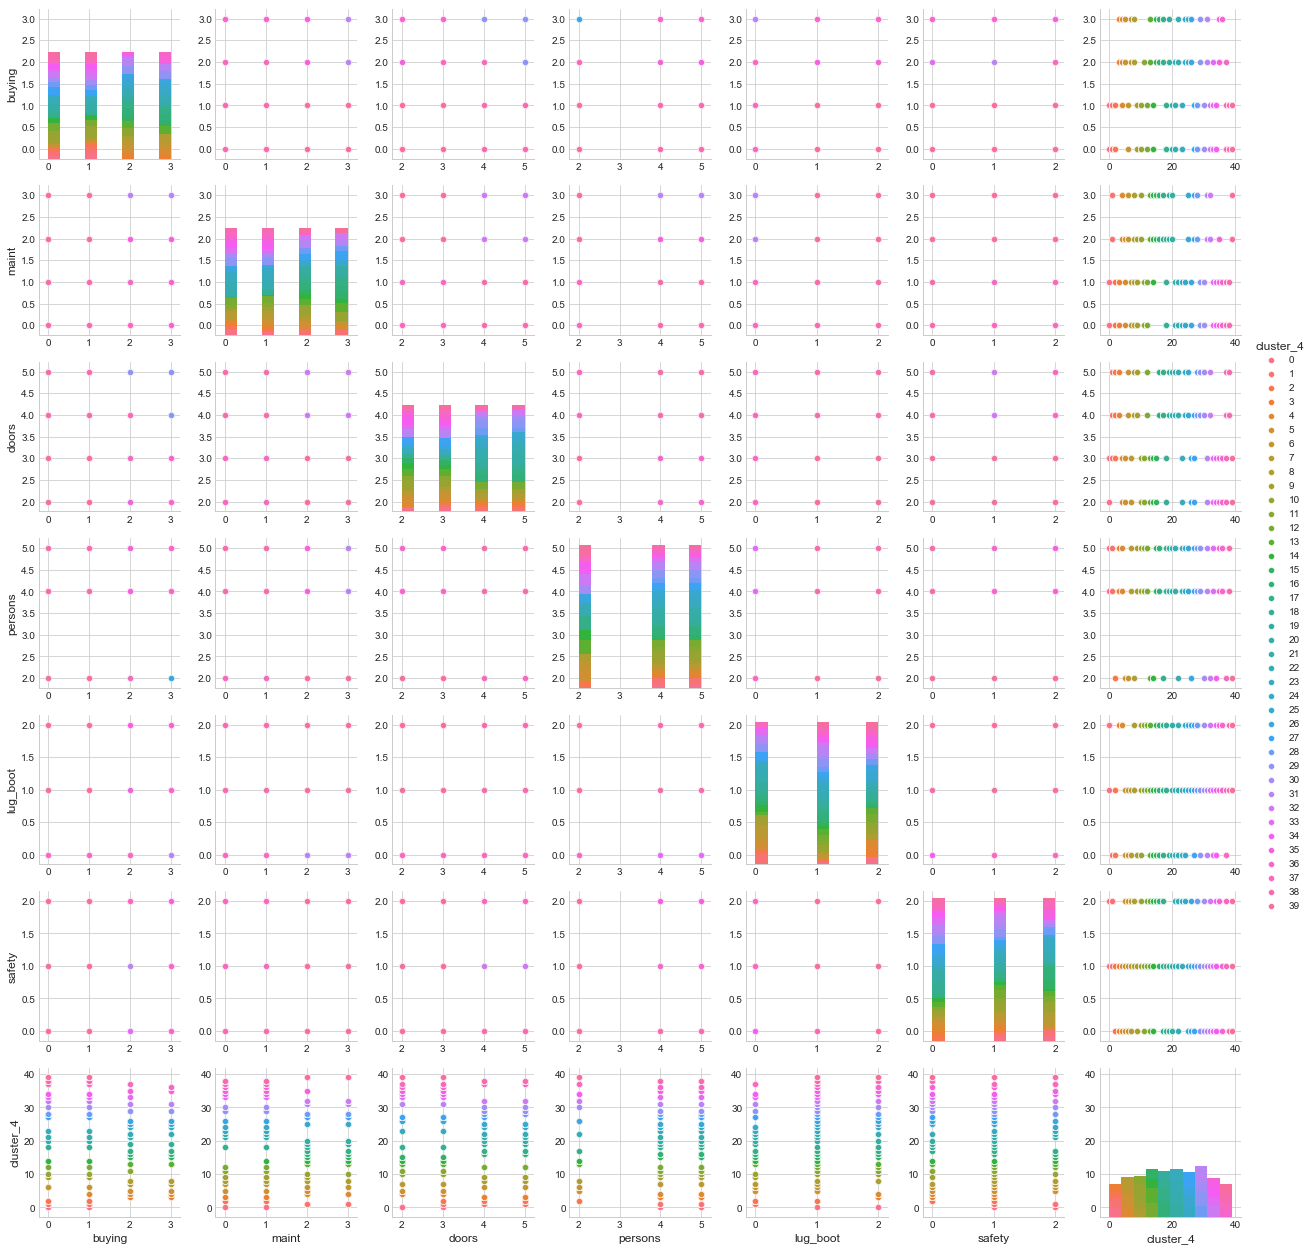

In [62]:
#K=40
kmeans_model_4 = KMeans(n_clusters=40,random_state=123)
distances_4 = kmeans_model_4.fit_transform(data.iloc[:,0:6])
labels_4 = kmeans_model_4.labels_
data['cluster_4']=labels_4
with sns.color_palette("Set2", 10):
    sns.pairplot(data.iloc[:,[0,1,2,3,4,5,14]], hue='cluster_4')

In [63]:
#compare labels K=40
tb4 = pd.crosstab(data['acceptable_label'],labels_4)
tb4

col_0,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
acceptable_label,,,,,,,,,,,,,,,,,,,,,
acc,8,24,0,16,4,0,0,23,0,0,...,0,25,0,0,0,19,13,0,0,0
good,0,0,0,0,12,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,0
unacc,28,16,28,16,24,47,28,25,32,32,...,36,36,44,36,48,0,19,31,32,38
vgood,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,13,0,0,0,0


In [64]:
#cluster_4_label
def cluster_4_label(alpha):
    label_max = max(tb4.iloc[i,alpha] for i in range(4))
    if tb4.iloc[0,alpha] == label_max:
        return 'acc'
    if tb4.iloc[1,alpha] == label_max:
        return 'good'
    if tb4.iloc[2,alpha] == label_max:
        return 'unacc'
    if tb4.iloc[3,alpha] == label_max:
        return 'vgood'
data['cluster_4_label']=data['cluster_4'].apply(cluster_4_label)
data.head()

,buying,maint,doors,persons,lug_boot,safety,acceptable,acceptable_label,cluster_1,cluster_1_label,cluster_2,cluster_2_label,cluster_3,cluster_3_label,cluster_4,cluster_4_label
0,0,0,2,2,0,0,0,unacc,2,unacc,0,unacc,8,unacc,34,unacc
1,0,0,2,2,0,1,0,unacc,2,unacc,0,unacc,8,unacc,34,unacc
2,0,0,2,2,0,2,0,unacc,2,unacc,0,unacc,8,unacc,37,unacc
3,0,0,2,2,1,0,0,unacc,2,unacc,0,unacc,8,unacc,34,unacc
4,0,0,2,2,1,1,0,unacc,2,unacc,0,unacc,8,unacc,34,unacc


In [65]:
cluster_1_accuracy = len(data[data['acceptable_label']==data['cluster_1_label']])/len(data)
cluster_2_accuracy = len(data[data['acceptable_label']==data['cluster_2_label']])/len(data)
cluster_3_accuracy = len(data[data['acceptable_label']==data['cluster_3_label']])/len(data)
cluster_4_accuracy = len(data[data['acceptable_label']==data['cluster_4_label']])/len(data)
print('K=4 KMeans -> {0:.4f}%'.format(cluster_1_accuracy*100))
print('K=8 KMeans -> {0:.4f}%'.format(cluster_2_accuracy*100))
print('K=16 KMeans -> {0:.4f}%'.format(cluster_3_accuracy*100))
print('K=40 KMeans -> {0:.4f}%'.format(cluster_4_accuracy*100))

K=4 KMeans -> 70.0231%
K=8 KMeans -> 70.8912%
K=16 KMeans -> 72.7431%
K=40 KMeans -> 80.9606%


In [66]:
#find center of K-means
centroids1 = kmeans_model_1.cluster_centers_
print (centroids1)

[[ 2.2         2.6         3.5         4.5         1.          1.        ]
 [ 2.2         0.4         3.5         4.5         1.          1.        ]
 [ 1.5         1.5         3.5         2.          1.          1.        ]
 [ 0.33333333  1.5         3.5         4.5         1.          1.        ]]


In [67]:
d_corr1=data.iloc[:,[0,1,2,3,4,5,8]].corr()
d_corr1
#lug_boot and persons

,buying,maint,doors,persons,lug_boot,safety,cluster_1
buying,1.000000,0.000000,0.0,0.000000e+00,0.000000e+00,0.0,-0.607892
maint,0.000000,1.000000,0.0,0.000000e+00,0.000000e+00,0.0,-0.191052
doors,0.000000,0.000000,1.0,0.000000e+00,0.000000e+00,0.0,0.000000
persons,0.000000,0.000000,0.0,1.000000e+00,2.523651e-19,0.0,-0.233540
lug_boot,0.000000,0.000000,0.0,2.523651e-19,1.000000e+00,0.0,0.000000
safety,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,1.0,0.000000
cluster_1,-0.607892,-0.191052,0.0,-2.335402e-01,0.000000e+00,0.0,1.000000


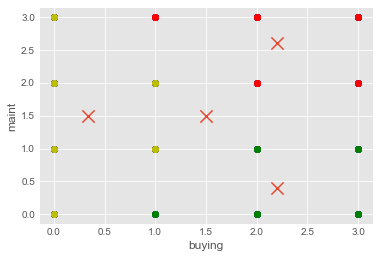

In [75]:
# buying and maint are chosen for plot
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
colors = ['r.', 'g.', 'b.', 'y.']
for i in range(len(data)):
    plt.plot(data.iloc[i,0],data.iloc[i,1], colors[data.iloc[i,8]], markersize = 10)    
plt.scatter(centroids1[:,0], centroids1[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('buying')
plt.ylabel('maint')
plt.show()


In [ ]:
#K=40

In [72]:
#find center of K-means k=40
centroids4 = kmeans_model_4.cluster_centers_
print (centroids4)

[[ 0.66666667  0.33333333  2.5         4.5         1.77777778  1.55555556]
 [ 0.5         2.5         4.2         4.5         0.          1.6       ]
 [ 0.5         0.5         4.28571429  2.          0.28571429  0.28571429]
 [ 2.5         0.5         4.5         4.5         2.          0.5       ]
 [ 2.2         2.5         2.5         4.5         2.          0.4       ]
 [ 2.5106383   1.0212766   2.4893617   2.          0.25531915  0.9787234 ]
 [ 0.5         2.5         4.42857143  2.          0.14285714  0.85714286]
 [ 2.58333333  0.41666667  2.5         4.5         0.16666667  1.33333333]
 [ 2.5         1.5         4.5         2.          1.75        1.75      ]
 [ 0.4375      0.9375      4.5625      4.5         0.          0.25      ]
 [ 0.51428571  2.48571429  2.42857143  4.5         1.34285714  1.57142857]
 [ 2.          0.5         2.5         4.5         1.5         0.5       ]
 [ 0.44827586  0.51724138  4.51724138  4.5         1.55172414  1.44827586]
 [ 2.5         2.6       

In [70]:
d_corr4=data.iloc[:,[0,1,2,3,4,5,-2]].corr()
d_corr4
#lug_boot and persons

,buying,maint,doors,persons,lug_boot,safety,cluster_4
buying,1.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.0000,-0.052335
maint,0.000000,1.000000,0.00000,0.000000e+00,0.000000e+00,0.0000,-0.077058
doors,0.000000,0.000000,1.00000,0.000000e+00,0.000000e+00,0.0000,-0.012030
persons,0.000000,0.000000,0.00000,1.000000e+00,2.523651e-19,0.0000,-0.058731
lug_boot,0.000000,0.000000,0.00000,2.523651e-19,1.000000e+00,0.0000,0.079510
safety,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,1.0000,-0.088200
cluster_4,-0.052335,-0.077058,-0.01203,-5.873123e-02,7.950988e-02,-0.0882,1.000000


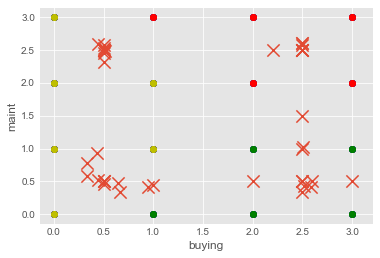

In [76]:
# K=40
for i in range(len(data)):
    plt.plot(data.iloc[i,0],data.iloc[i,1], colors[data.iloc[i,8]], markersize = 10)    
plt.scatter(centroids4[:,0], centroids4[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('buying')
plt.ylabel('maint')
plt.show()
#good cluster centers to fit original dataset

In [35]:
datalist_label = data.acceptable
scanK = pd.DataFrame(data=datalist_label[0:],
                   columns=['acceptable'])
scanK['acceptable_label'] =raw_data.acceptable_label
scanK.head()


,acceptable,acceptable_label
0,0,unacc
1,0,unacc
2,0,unacc
3,0,unacc
4,0,unacc


In [37]:
#for loop for K-means 
for i in range(1,100):
    kmeans_model_i = KMeans(n_clusters=i,random_state=123)
    distances_i = kmeans_model_i.fit_transform(data.iloc[:,0:6])
    labels_i = kmeans_model_i.labels_
    scanK['cluster_i']=labels_i
    tb1 = pd.crosstab(data['acceptable_label'],labels_i)

    scanK['cluster_i_label']=scanK['cluster_i'].apply(cluster_1_label)
    Ki_accuracy = len(scanK[scanK['acceptable_label']==scanK['cluster_i_label']])/len(scanK)
    print('K=',i,' KMeans -> {0:.4f}%'.format(Ki_accuracy*100))

K= 1  KMeans -> 70.0231%
K= 2  KMeans -> 70.0231%
K= 3  KMeans -> 70.0231%
K= 4  KMeans -> 70.0231%
K= 5  KMeans -> 70.0231%
K= 6  KMeans -> 70.0231%
K= 7  KMeans -> 70.0231%
K= 8  KMeans -> 70.8912%
K= 9  KMeans -> 70.7176%
K= 10  KMeans -> 70.0231%
K= 11  KMeans -> 71.8750%
K= 12  KMeans -> 71.8750%
K= 13  KMeans -> 71.8750%
K= 14  KMeans -> 71.8750%
K= 15  KMeans -> 71.8750%
K= 16  KMeans -> 72.7431%
K= 17  KMeans -> 76.2153%
K= 18  KMeans -> 76.0417%
K= 19  KMeans -> 72.5116%
K= 20  KMeans -> 76.8519%
K= 21  KMeans -> 74.7685%
K= 22  KMeans -> 80.4977%
K= 23  KMeans -> 79.1088%
K= 24  KMeans -> 80.4398%
K= 25  KMeans -> 82.6968%
K= 26  KMeans -> 78.9931%
K= 27  KMeans -> 79.8032%
K= 28  KMeans -> 82.4653%
K= 29  KMeans -> 82.4653%
K= 30  KMeans -> 81.4236%
K= 31  KMeans -> 82.1759%
K= 32  KMeans -> 81.1343%
K= 33  KMeans -> 83.4491%
K= 34  KMeans -> 84.3750%
K= 35  KMeans -> 81.1921%
K= 36  KMeans -> 84.0856%
K= 37  KMeans -> 83.6227%
K= 38  KMeans -> 80.6134%
K= 39  KMeans -> 83.0